Project Overview
to extract financial data like historical share price and quarterly revenue reportings from various sources using Python libraries and webscraping on popular stocks. After collecting this data you will visualize it in a dashboard to identify patterns or trends. The stocks we will work with are Netflix, Amazon,and AMD.

In [15]:
!pip install yfinance
!pip install matplotlib

In [11]:
import yfinance as yf
import pandas as pd

Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [16]:
apple = yf.Ticker("AAPL")
amd = yf.Ticker("AMD")

Using the attribute info we can extract information about the stock as a Python dictionary.

In [14]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

--2024-12-08 06:35:33--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5699 (5.6K) [application/json]
Saving to: ‘apple.json’

apple.json          100%[===================>]   5.57K  --.-KB/s    in 0s      

2024-12-08 06:35:34 (1004 MB/s) - ‘apple.json’ saved [5699/5699]



In [17]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

Extracting Share Price
A share is the single smallest part of a company's stock that you can buy, the prices of these shares fluctuate over time. Using the history() method we can get the share price of the stock over a certain period of time. Using the period parameter we can set how far back from the present to get data. The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.

In [18]:
apple_share_price_data = apple.history(period="max")

In [19]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0


In [21]:
apple_share_price_data.reset_index(inplace=True)

<Axes: xlabel='Date'>

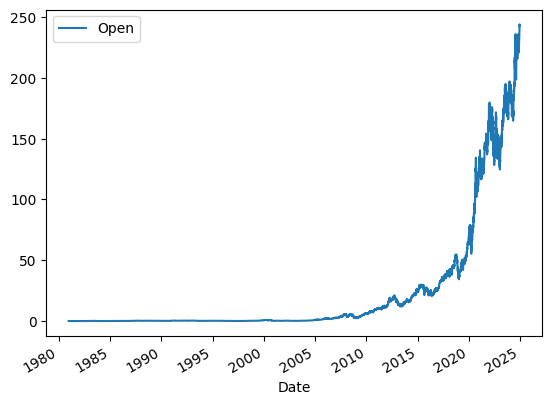

In [22]:
apple_share_price_data.plot(x="Date", y="Open")

Extracting Dividends
Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.


In [23]:
apple.dividends

,Dividends
Date,
1987-05-11 00:00:00-04:00,0.000536
1987-08-10 00:00:00-04:00,0.000536
1987-11-17 00:00:00-05:00,0.000714
1988-02-12 00:00:00-05:00,0.000714
1988-05-16 00:00:00-04:00,0.000714
...,...
2023-11-10 00:00:00-05:00,0.240000
2024-02-09 00:00:00-05:00,0.240000
2024-05-10 00:00:00-04:00,0.250000


<Axes: xlabel='Date'>

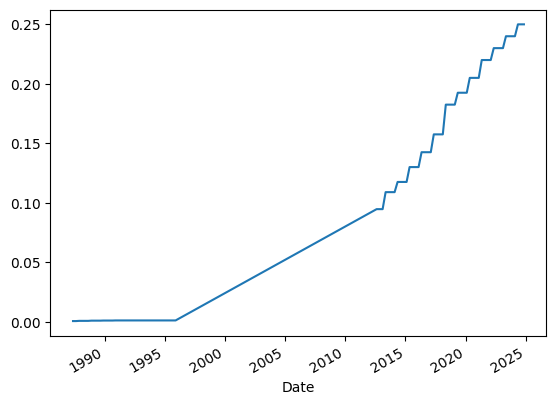

In [24]:
apple.dividends.plot()

Now Let's Check for AMD

In [26]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

--2024-12-08 06:41:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5838 (5.7K) [application/json]
Saving to: ‘amd.json’

amd.json            100%[===================>]   5.70K  --.-KB/s    in 0s      

2024-12-08 06:41:04 (1.87 GB/s) - ‘amd.json’ saved [5838/5838]



In [27]:
import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

In [28]:
amd_share_price_data = amd.history(period="max")

In [31]:
amd_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.0,3.302083,3.125000,3.145833,219600,0.0,0.0
1980-03-18 00:00:00-05:00,0.0,3.125000,2.937500,3.031250,727200,0.0,0.0
1980-03-19 00:00:00-05:00,0.0,3.083333,3.020833,3.041667,295200,0.0,0.0
1980-03-20 00:00:00-05:00,0.0,3.062500,3.010417,3.010417,159600,0.0,0.0
1980-03-21 00:00:00-05:00,0.0,3.020833,2.906250,2.916667,130800,0.0,0.0


In [32]:
amd_share_price_data.reset_index(inplace=True)

<Axes: xlabel='Date'>

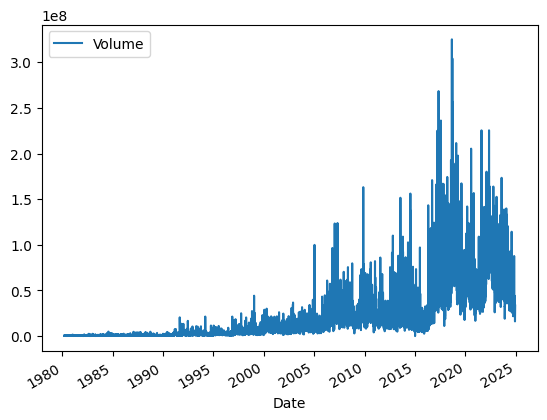

In [34]:
amd_share_price_data.plot(x="Date", y="Volume")

# Not all stock data is available via the API, you will use web-scraping to obtain financial data.

In [36]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib
!pip install lxml
!pip install plotly


In [37]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [38]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Using Webscraping to Extract Stock Data Example:
We will extract Netflix stock data https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html.

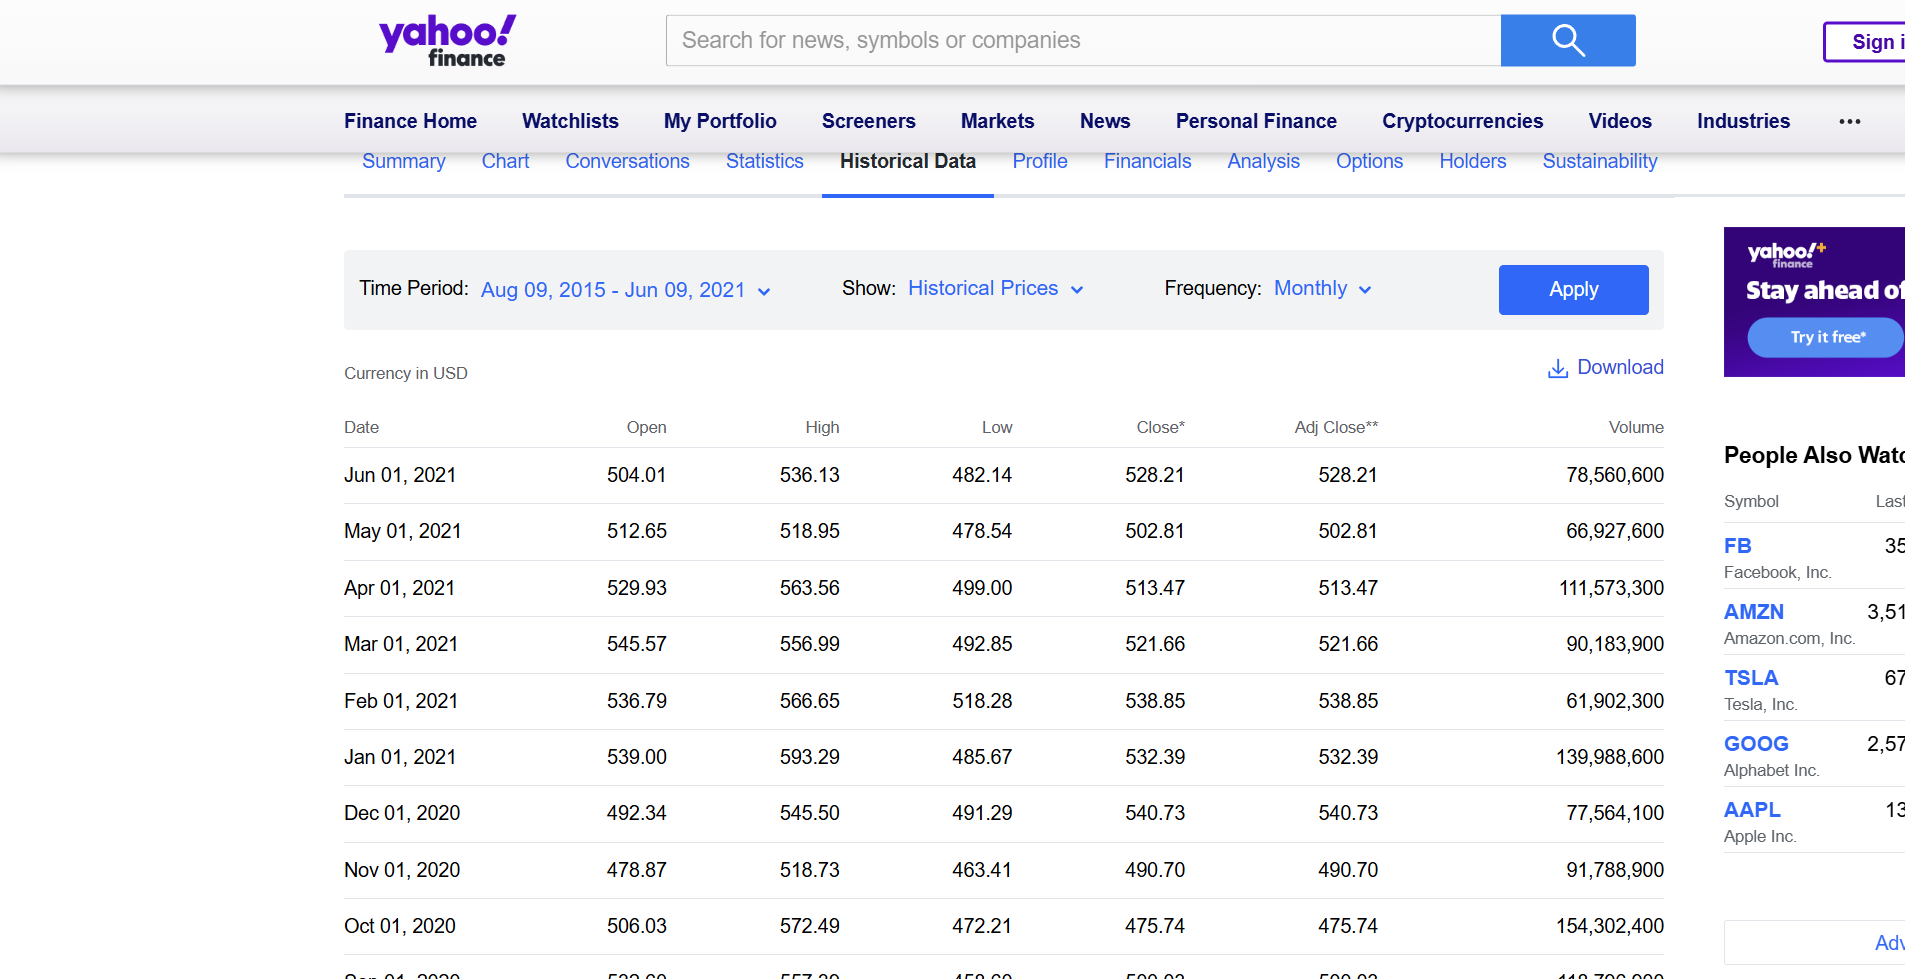

we need to extract everything on the table except adj close

# Steps for extracting the data
1. Send an HTTP request to the web page using the requests library.
2. Parse the HTML content of the web page using BeautifulSoup.
3. Identify the HTML tags that contain the data you want to extract.
4. Use BeautifulSoup methods to extract the data from the HTML tags.
5. Print the extracted data


In [39]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

In [40]:
data  = requests.get(url).text
print(data)

<!DOCTYPE html><html id="atomic" class="NoJs chrome desktop" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>Netflix, Inc. (NFLX) Stock Historical Prices &amp; Data - Yahoo Finance</title><meta name="keywords" content="NFLX, Netflix, Inc., NFLX historical prices, Netflix, Inc. historical prices, historical prices, stocks, quotes, finance"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="458584288257241"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="Discover historical prices for NFLX stock on Yahoo Finance. View daily, weekly or monthly format back to when Netflix, Inc. stock was issued."/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/><met

2)Create a new BeautifulSoup object.

Note: To create a BeautifulSoup object in Python, you need to pass two arguments to its constructor:

The HTML or XML content that you want to parse as a string.
The name of the parser that you want to use to parse the HTML or XML content. This argument is optional, and if you don't specify a parser, BeautifulSoup will use the default HTML parser included with the library. here in this lab we are using "html5lib" parser.

In [41]:
soup = BeautifulSoup(data, 'html.parser')

3)The web page consists of a table so, we will scrape the content of the HTML web page and convert the table into a data frame.

You will create an empty data frame using the pd.DataFrame() function with the following columns:

"Date"
"Open"
"High"
"Low"
"Close"
"Volume"

In [42]:
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

4)We will use find() and find_all() methods of the BeautifulSoup object to locate the table body and table row respectively in the HTML.

The find() method will return particular tag content.
The find_all() method returns a list of all matching tags in the HTML.

In [43]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    volume = col[6].text

    # Finally we append the data of each row to the table
    netflix_data = pd.concat([netflix_data,pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Volume":[volume]})], ignore_index=True)

We can now print out the data frame using the head() or tail() function.

In [44]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600"
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600"
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300"
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900"
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300"


# We can also Extract data using pandas `read_html` function from the pandas library and use the URL for extracting data.

In [45]:
read_html_pandas_data = pd.read_html(url)

In [47]:
read_html_pandas_data = pd.read_html(str(soup))

Because there is only one table on the page, just take the first table in the returned list.

In [48]:
netflix_dataframe = read_html_pandas_data[0]

netflix_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300
